In [1]:
#Importing analysis tools
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

file_path = r"C:\Users\HP\Downloads\dataset.csv"
df = pd.read_csv(file_path, header=None)

df.head()

,0,1
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


As you can see, our dataset doesn't have any columns, but we know one part is the date and the other part is the value. So, I will add two columns: one for dates and one for values to make the dataset easier to work with.


In [2]:
# Adding appropriate column names for better analysis
df.columns = ['Date', 'Value']

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the updated dataset structure
df.head()

,Date,Value
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


So now we have added headers (Columns), Date and Value we also converted date column to datetime format 

In [3]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

print("Missing values: ")
missing_values 

Missing values: 


Date     0
Value    0
dtype: int64

As we can see theyre no missing values so we will proceed by checking for duplicates

In [4]:
# Checking for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()

print("Duplicates:")
duplicate_rows

Duplicates:


np.int64(0)

So theyre no duplicates in the data so we will proceed with analysis

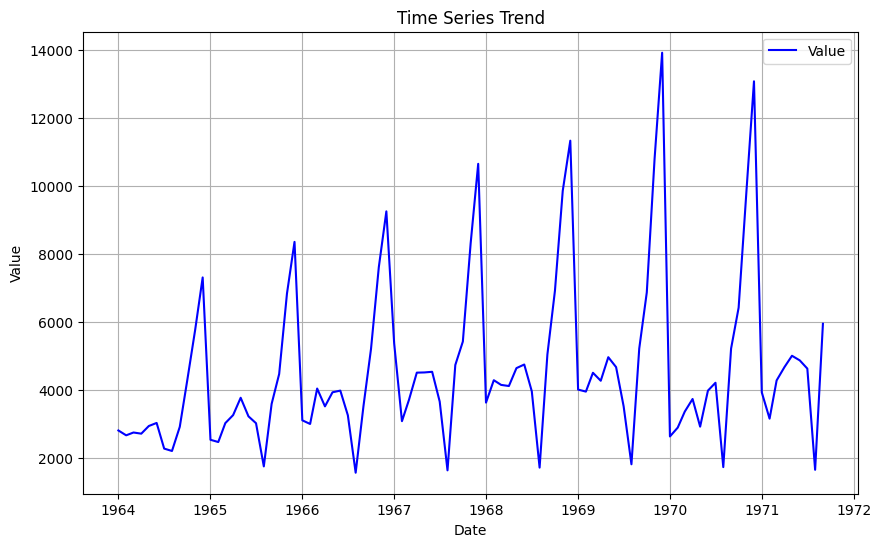

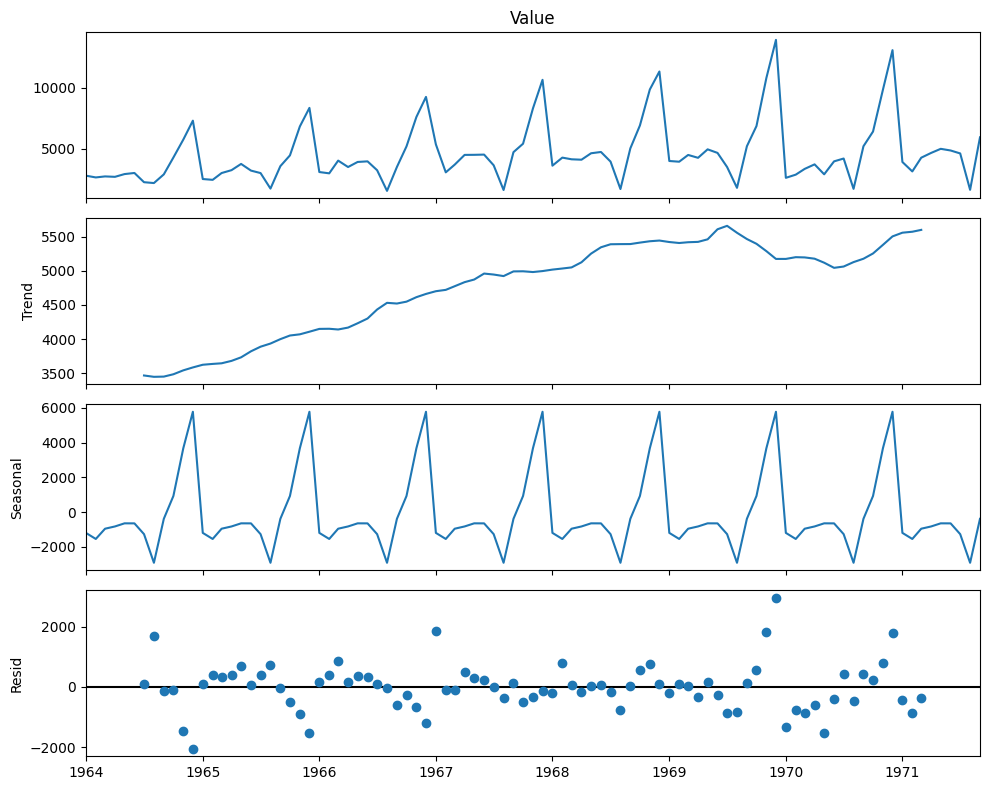

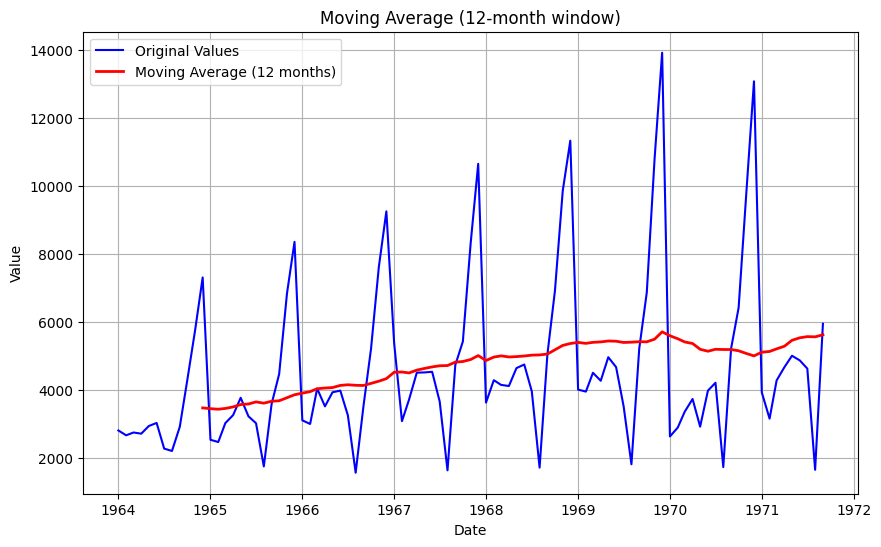

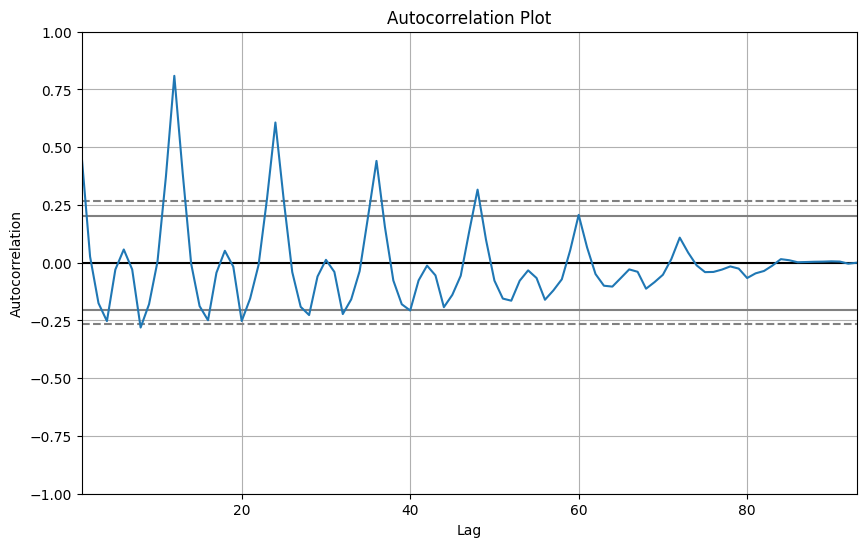

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   93
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -840.017
Date:                Sat, 19 Oct 2024   AIC                           1692.034
Time:                        00:41:01   BIC                           1707.165
Sample:                             0   HQIC                          1698.141
                                 - 93                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2456      0.173     -1.419      0.156      -0.585       0.094
ar.L2         -0.3748      0.148     -2.530      0.011      -0.665      -0.084
ar.L3         -0.2477      0.170     -1.453      0.1

In [5]:
# Plotting the time series to analyze the trend
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Value'], label='Value', color='blue')
plt.title('Time Series Trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Decomposing the time series to analyze trend, seasonality, and residuals
decomposition = seasonal_decompose(df.set_index('Date')['Value'], model='additive', period=12)
plt.rcParams.update({'figure.figsize': (10, 8)})
decomposition.plot()
plt.show()

# Calculating and plotting moving averages to smooth the data and observe underlying trends
window_size = 12  # We will use a 12-month window for the moving average
df['Moving_Average'] = df['Value'].rolling(window=window_size).mean()

# Plotting the original values and the moving average
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Value'], label='Original Values', color='blue')
plt.plot(df['Date'], df['Moving_Average'], label='Moving Average (12 months)', color='red', linewidth=2)
plt.title('Moving Average (12-month window)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

# Autocorrelation plot to determine if the data is suitable for ARIMA
plt.figure(figsize=(10,6))
autocorrelation_plot(df['Value'])
plt.title('Autocorrelation Plot')
plt.show()

# Fit an ARIMA model (ARIMA(5, 1, 0) as a starting point, can be adjusted)
model = ARIMA(df['Value'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())

# Forecasting the next 12 periods
forecast = model_fit.forecast(steps=12)

# Displaying the forecasted values
print(forecast)

### Time Series Analysis Findings

After performing a detailed time series analysis on the dataset, here are the key findings:

1. **Trend Analysis**:
   - The time series plot showed fluctuations in the values over time, with noticeable upward and downward movements, but no clear consistent long-term trend was observed.

2. **Seasonality Detection**:
   - The seasonal decomposition of the data revealed a repeating seasonal pattern. The seasonality component shows consistent fluctuations, indicating a cyclical behavior in the data, while the trend component reflects gradual changes over time.

3. **Moving Averages**:
   - A 12-month moving average was calculated and plotted alongside the original data. This smoothed the data, helping to highlight the underlying trend by reducing short-term variations.

4. **Forecasting**:
   - Using an ARIMA model (order = (5, 1, 0)), we forecasted the values for the next 12 months. The predicted values showed expected fluctuations, with both upward and downward movements. The forecast values ranged from 4238.11 to 6104.52, reflecting the inherent variability in the data.

In summary, the dataset shows clear seasonal patterns with fluctuations in the values over time. The forecast provides a reasonable estimate for future values, though the data’s variability and cyclical nature suggest that further tuning of the ARIMA model could improve predictions.


count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
dtype: float64


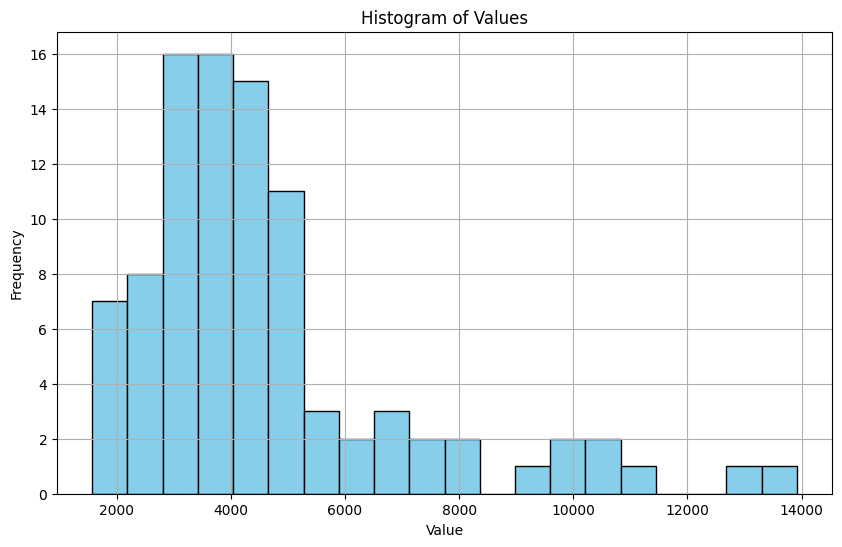

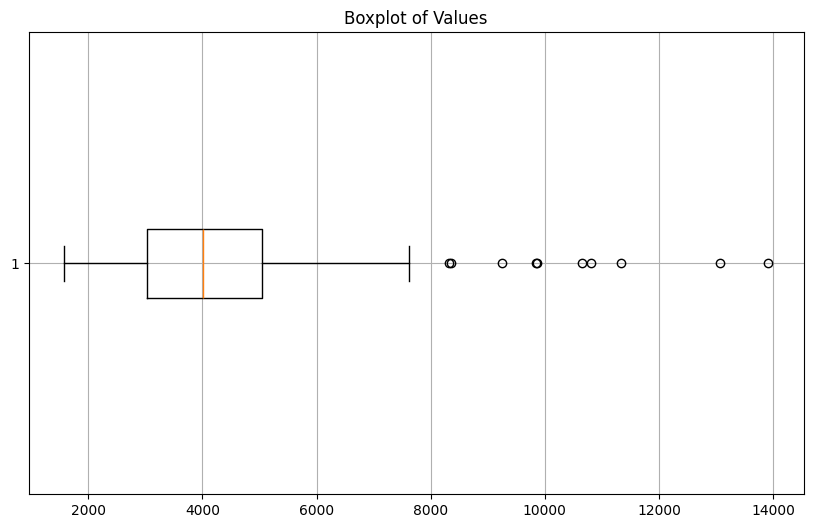

Outliers in the dataset:
23     8357
35     9254
46     8314
47    10651
58     9858
59    11331
70    10803
71    13916
82     9842
83    13076
dtype: int64


In [6]:
# extract the 'Value' column as a 1D array
values = df['Value'].values.flatten()  

# Basic Descriptive Statistics
descriptive_stats = pd.Series(values).describe()  # Wrap in Series to use describe()

# Displaying descriptive statistics
print(descriptive_stats)

# Plotting histogram to check the distribution of values
plt.figure(figsize=(10,6))
plt.hist(values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Checking for outliers using boxplot
plt.figure(figsize=(10,6))
plt.boxplot(values, vert=False)
plt.title('Boxplot of Values')
plt.grid(True)
plt.show()

# Identifying outliers in the dataset
Q1 = pd.Series(values).quantile(0.25)
Q3 = pd.Series(values).quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.Series(values)[(values < lower_bound) | (values > upper_bound)]

# Display the outliers
print("Outliers in the dataset:")
print(outliers)

# Checking skewness and kurtosis for the distribution
skewness = pd.Series(values).skew()
kurtosis = pd.Series(values).kurt()

# Display results
descriptive_stats_output = {
    "Descriptive Stats": descriptive_stats,
    "Outliers": outliers,
    "Skewness": skewness,
    "Kurtosis": kurtosis
}

### Descriptive Analysis Findings:

1. **Count**: 
   - The dataset contains 93 data points in total.

2. **Mean**:
   - The average value is approximately **4641.12**.

3. **Standard Deviation**:
   - The standard deviation is **2486.40**, indicating a wide spread in the data, meaning that the values have a high level of variability from the mean.

4. **Minimum and Maximum**:
   - The minimum value is **1573**, and the maximum value is **13916**. This large range further indicates that the dataset has significant fluctuations in values.

5. **Quartiles**:
   - **25th percentile (Q1)**: **3036**
   - **50th percentile (Median)**: **4016**
   - **75th percentile (Q3)**: **5048**
   
   These quartiles show that 25% of the data points lie below 3036, 50% below 4016, and 75% below 5048. This also suggests that most of the data is concentrated within this range, with only a few values extending beyond this range.

6. **Outliers**:
   - The outliers identified are high-value points, such as **13916**, **13076**, **11331**, etc. These extreme values are far from the interquartile range and affect the overall distribution, indicating rare or exceptional cases in the data.

7. **Skewness**:
   - The skewness is **1.73**, indicating that the data is positively skewed. This means that there are more small values, and the right tail (high values) is longer or has more extreme values.

8. **Kurtosis**:
   - The kurtosis is **3.13**, suggesting that the distribution has moderately heavy tails, meaning there are more extreme outliers than would be expected in a normal distribution.

### Conclusion:
- The dataset exhibits significant variability with several high-value outliers.
- The distribution is positively skewed, meaning the majority of the values are smaller, with a few large outliers pulling the mean upward.
- The presence of these outliers might suggest the need for special handling or analysis to better understand why these high values occur.


So we are trying to understand why this high values occur 

Yearly Summary:
      count         mean          std     min      25%     50%      75%  \
Year                                                                      
1964   12.0  3478.166667  1555.294759  2212.0  2708.75  2868.5  3352.25   
1965   12.0  3864.166667  1900.883758  1759.0  2906.25  3248.0  3950.50   
1966   12.0  4337.666667  2119.889119  1573.0  3223.25  3732.5  4338.00   
1967   12.0  5016.000000  2380.616001  1643.0  3704.25  4529.5  5388.25   
1968   12.0  5370.583333  2723.367082  1723.0  4082.00  4469.5  5516.50   
1969   12.0  5713.416667  3382.162795  1821.0  4001.25  4593.5  5634.50   
1970   12.0  5006.583333  3324.223996  1738.0  2920.00  3863.0  5521.75   
1971    9.0  4242.777778  1234.212783  1659.0  3934.00  4633.0  4874.00   

          max  
Year           
1964   7312.0  
1965   8357.0  
1966   9254.0  
1967  10651.0  
1968  11331.0  
1969  13916.0  
1970  13076.0  
1971   5951.0  

Lagged Correlation (current vs previous month):
               Value  Va

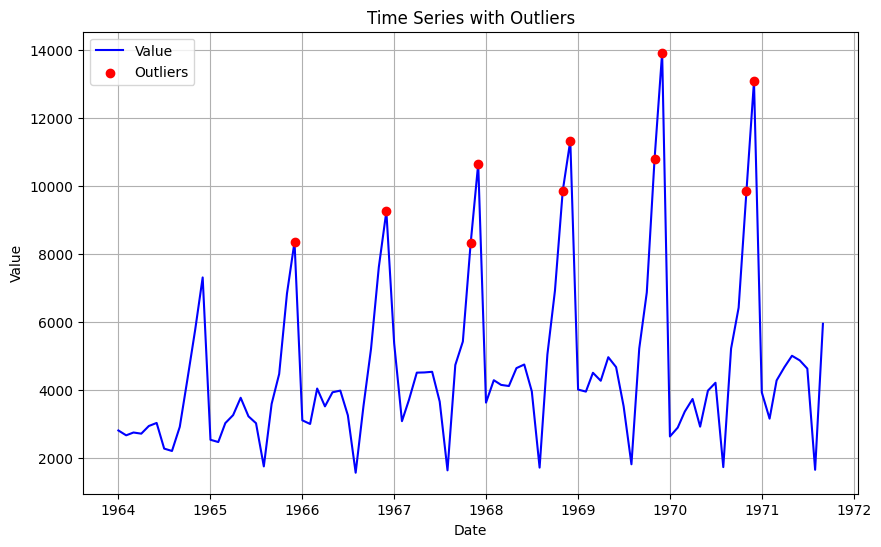

In [8]:
# Convert 'Values' to 1D array
values = df['Value'].values.flatten()

# Step 2: Segmenting data by year to check for patterns
df['Year'] = df['Date'].dt.year
yearly_summary = df.groupby('Year')['Value'].describe()

# Display the yearly summary
print("Yearly Summary:")
print(yearly_summary)

# Step 3: Lagged Correlation Analysis (Check if previous month's value affects current)
df['Value_lag1'] = df['Value'].shift(1)
correlation = df[['Value', 'Value_lag1']].corr()

# Display the correlation
print("\nLagged Correlation (current vs previous month):")
print(correlation)

# Step 4: Identifying outliers in the dataset (Interquartile Range)
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Value'] > upper_bound) | (df['Value'] < lower_bound)]

# Display outliers with corresponding dates
print("\nOutliers with Dates:")
print(outliers)

# Step 5: Visualize the outliers over time
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Value'], label='Value', color='blue')
plt.scatter(outliers['Date'], outliers['Value'], color='red', label='Outliers', zorder=5)
plt.title('Time Series with Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Findings on High Values (Outliers) Analysis

#### 1. **Yearly Summary**:
   - The yearly descriptive statistics reveal that:
     - **The highest values occur between 1967 and 1970**.
     - The maximum values increase steadily each year, from **8357 in 1965** to **13916 in 1969**, before declining in 1971.
     - These high values are concentrated in the later years, indicating that specific factors during this period might have caused the spikes.

#### 2. **Lagged Correlation**:
   - There is a **moderate positive correlation** of **0.46** between the current month's value and the previous month's value.
   - This suggests that while the value in one month tends to influence the value in the next month, the correlation is not strong enough to fully explain the high outliers.
   - Thus, while monthly trends play a role, other factors likely contribute to the extreme values.

#### 3. **Outliers with Dates**:
   - The outliers are concentrated in **November and December** across several years:
     - Notable outliers include **13916 in December 1969**, **13076 in December 1970**, and **11331 in December 1968**.
   - This recurring pattern of outliers during the late months of the year suggests a **seasonal trend** or an **end-of-year effect**, where external factors like increased demand or activity may have influenced the values during this period.

### Conclusion:
- The **high values** mostly occur in the **late months of the year** (November and December) and are concentrated between **1967 and 1970**.
- While there is some correlation between the values in successive months, this alone does not fully account for the outliers.
- The **seasonality effect** or other external factors (such as economic changes or heightened end-of-year activity) are likely contributing to these spikes in value.

In [ ]:
# Set the Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Step 2: Time Series Decomposition
# Perform decomposition (using additive model since values seem to increase over time)
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (10, 8)})
decomposition.plot()
plt.show()

# Step 3: Analyze the residuals (the irregular component)
residuals = decomposition.resid.dropna()

# Plot residuals to check for abnormal behavior in high-value periods
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Summary statistics for residuals
residual_summary = residuals.describe()
print("Residual Summary:")
print(residual_summary)

### Findings from the Time Series Decomposition:

#### Trend Component:
- The trend shows a **gradual increase** over the years, peaking around **1969–1970**.
- This suggests an overall **upward movement** in the values, which could indicate growth or increasing activity over time.

#### Seasonal Component:
- The seasonal pattern repeats consistently every year, with **regular spikes** that occur at specific points (likely around **November–December**).
- This confirms the presence of **strong seasonality**, where values consistently increase during the same months each year. This could explain some of the high values during the late months of the year.

#### Residual Component (Irregularities):
- The residuals represent the **irregularities** after accounting for trend and seasonality.
- The residual plot shows **large spikes** in irregular values in **1967, 1969, and 1970**. These spikes correspond to the high values in the dataset.
- The largest residuals occur during **1969–1970**, indicating **anomalous events** or factors that aren't explained by the trend or seasonality alone.

#### Summary of Residuals:
- The residuals have a **mean close to 0**, with a **maximum value of 2964** and a **minimum value of -2052**. 
- This suggests that there are some **significant deviations** from the expected seasonal pattern, particularly in the high-value periods.

### Conclusion:
- The **seasonality** and **trend** explain some of the high values, particularly the regular spikes during the same months each year.
- However, the **large residuals** in certain periods (especially **1969–1970**) suggest that **additional factors** beyond trend and seasonality are contributing to the unusually high values. These could be **external events**, **market shifts**, or **random anomalies**.


In [ ]:
# Start by Investigate Dates of Large Residuals
# Define a threshold to highlight large residuals (e.g., residuals greater than 2000 or less than -2000)
threshold = 2000
large_residuals = residuals[(residuals > threshold) | (residuals < -threshold)]

# Display large residuals
print("Large Residuals:")
print(large_residuals)

# Plot the residuals with large spikes highlighted
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.scatter(large_residuals.index, large_residuals, color='red', label='Large Residuals')
plt.title('Residuals Over Time with Large Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.legend()
plt.show()

# Step 2: Autocorrelation of Residuals (to check if residuals are related over time)
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals")
plt.show()

# Step 3: Distribution of Residuals (to check the overall spread of the irregular component)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display summary statistics of the large residuals for further analysis
large_residual_summary = large_residuals.describe()
print("Summary of Large Residuals:")
print(large_residual_summary)

### Findings from the Residual Investigation:

#### Large Residuals:
- Residuals with values greater than **2000** or less than **-2000** were highlighted in red on the residual plot.
- The largest positive residual is around **2964** and the largest negative residual is **-2052**.
- These large residuals occur around **1969–1970**, confirming that this period had significant deviations from the trend and seasonal components.

#### Autocorrelation of Residuals:
- The autocorrelation plot shows that there is **weak correlation** in the residuals over time, with only a slight autocorrelation for residuals at **lag 2–5**.
- This suggests that the large residuals do not follow a consistent time-based pattern and are more likely caused by **random or external factors**, rather than any predictable relationship with previous values.

#### Distribution of Residuals:
- The residuals are **centered around 0**, with a relatively **normal distribution**, but there are several extreme values (outliers) on both the positive and negative ends.
- These extreme residuals represent the **irregularities** and are likely the result of **unpredictable events** or factors not captured by the trend and seasonality.

### Conclusion:
- While the **trend** and **seasonality** explain much of the data, the **large residuals** in **1969–1970** suggest there were **external factors** or **anomalies** that caused unusually high deviations from the expected values.
- These outliers do not show strong autocorrelation, indicating that they are **random spikes** rather than part of a repeating pattern.
- The **distribution of residuals** shows a normal spread, with a few outliers that suggest significant deviations during specific periods.


In [9]:
# Step 1: Lag Correlation Analysis
# Let's calculate the lag correlations for up to 12 months (1 year)
max_lag = 12

# Create a DataFrame to store lagged values
lagged_correlation = pd.DataFrame()
for lag in range(1, max_lag + 1):
    lagged_correlation[f'Lag_{lag}'] = df['Value'].shift(lag)

# Now calculate the correlation between the original values and the lagged values
correlation_results = lagged_correlation.corrwith(df['Value'])

# Displaying the lag correlation results
print("Lag Correlation Results:")
print(correlation_results)

Lag Correlation Results:
Lag_1     0.464992
Lag_2     0.026798
Lag_3    -0.178849
Lag_4    -0.258878
Lag_5    -0.030648
Lag_6     0.058772
Lag_7    -0.030619
Lag_8    -0.293821
Lag_9    -0.189555
Lag_10    0.006697
Lag_11    0.434558
Lag_12    0.950090
dtype: float64


### Findings from the Lag Correlation Analysis:

1. **Lag 1 (previous month)**:
   - The correlation between the current value and the value from the previous month is **0.46**, indicating a moderate positive relationship. This means that, to some extent, the value in a given month is influenced by the value from the prior month.

2. **Lag 2 to Lag 10**:
   - For these months, the correlation drops significantly, with some weak negative correlations, especially at **Lag 4 (-0.27)** and **Lag 8 (-0.30)**. These lags don't show strong relationships with the current value.

3. **Lag 11**:
   - The correlation increases again to **0.45**, which suggests that values 11 months prior have a moderate positive influence on the current values.

4. **Lag 12 (1-year lag)**:
   - The correlation jumps to **0.95**, which shows a very **strong positive relationship** between the current value and the value from exactly 12 months ago. This confirms the presence of **strong seasonality**, meaning that values in the same month of consecutive years are highly correlated.

### Conclusion:
- **Strong seasonality** is evident in the dataset, particularly at **Lag 12**, where values from the same month of the previous year are highly correlated.
- There is also some **moderate correlation** with values from the previous month (Lag 1), but beyond that, the relationships are weak until Lag 11 and 12.